<a href="https://colab.research.google.com/github/aadyakoirala/analytics-projects/blob/main/InsuranceClaimsLASSO_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [ ]:
!git clone https://github.com/danielbauer1979/MSDIA_PredictiveModelingAndMachineLearning.git

Cloning into 'MSDIA_PredictiveModelingAndMachineLearning'...
remote: Enumerating objects: 367, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 367 (delta 71), reused 15 (delta 15), pack-reused 253 (from 2)
Receiving objects: 100% (367/367), 49.94 MiB | 15.35 MiB/s, done.
Resolving deltas: 100% (182/182), done.
Updating files: 100% (82/82), done.


In [ ]:
dat_1 = pd.read_csv('MSDIA_PredictiveModelingAndMachineLearning/GB886_VI_13_InsuranceClaims_1.csv')
dat_2 = pd.read_csv('MSDIA_PredictiveModelingAndMachineLearning/GB886_VI_13_InsuranceClaims_2.csv')
dat_3 = pd.read_csv('MSDIA_PredictiveModelingAndMachineLearning/GB886_VI_13_InsuranceClaims_3.csv')
df = pd.concat([dat_1,dat_2,dat_3])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188317 entries, 0 to 68316
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 191.1+ MB


In [ ]:
df.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [ ]:
df.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000
mean,294136.546440,0.493862,0.507190,0.498918,0.491814,0.487429,0.490946,0.484971,0.486439,0.485507,0.498067,0.493512,0.493152,0.493139,0.495718,3037.346151
std,169336.357671,0.187640,0.207201,0.202105,0.211292,0.209027,0.205272,0.178450,0.199370,0.181660,0.185876,0.209736,0.209426,0.212777,0.222488,2904.091574
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.000000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294542.000000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.580000
75%,440682.000000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.050000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


## Preparing the data

In [ ]:
df = df[df['loss']>100]

In [ ]:
#delete the id column
del df['id']

 Since running the LASSO with the full set of data can take a very long time (especially if the penalty parameters aren's chosen right), it is fine to only us a sample of the data (you likely wouldn't do that in practice):

In [ ]:
df = df.sample(n=50000, random_state=45)

In [ ]:
## convert categorical into dummies
objects = []
for c in df.columns:
    if str(df[c].dtype) == 'object':
        objects.append(c)
X_ = df.drop(objects, axis = 1).astype('float64')
X_ = X_.drop(['loss'], axis = 1)
dummies = pd.get_dummies(df[objects], drop_first=True)
X = pd.concat([X_, dummies], axis = 1)
y = df.loss

Let's look at out features

In [ ]:
X

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,...,cat116_O,cat116_P,cat116_Q,cat116_R,cat116_S,cat116_T,cat116_U,cat116_W,cat116_X,cat116_Y
51707,0.632041,0.827585,0.673861,0.564742,0.924177,0.662161,0.489790,0.61229,0.64873,0.77634,...,False,False,False,False,False,False,False,False,False,False
45939,0.434106,0.159990,0.174588,0.574758,0.281143,0.451115,0.365598,0.42345,0.52728,0.71775,...,False,False,False,False,False,False,False,False,False,False
40329,0.856661,0.245921,0.230975,0.705434,0.281143,0.910760,0.680957,0.89839,0.81945,0.83202,...,False,False,False,False,False,False,False,False,False,False
27609,0.181508,0.488789,0.298977,0.336414,0.482436,0.269983,0.296289,0.33372,0.24958,0.27777,...,False,False,False,False,False,False,False,False,False,False
45781,0.509110,0.358319,0.549770,0.432728,0.508483,0.304628,0.361943,0.58354,0.46226,0.38016,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5741,0.432682,0.620805,0.692825,0.229617,0.281143,0.611915,0.786509,0.38318,0.39447,0.50000,...,False,False,False,False,False,False,False,False,False,False
23559,0.254071,0.737068,0.654310,0.383428,0.422268,0.240069,0.360349,0.42345,0.27393,0.21230,...,False,False,False,False,False,False,False,False,False,False
35635,0.330514,0.681761,0.613660,0.473202,0.911073,0.240069,0.279895,0.24564,0.30859,0.32446,...,False,False,False,False,False,False,False,False,False,False
52237,0.455585,0.737068,0.673861,0.796346,0.388783,0.519747,0.424124,0.93736,0.51050,0.49444,...,False,False,False,False,False,False,False,False,False,False


<BarContainer object of 935 artists>

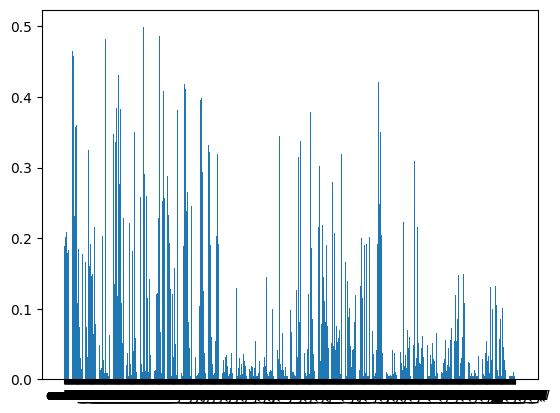

In [ ]:
plt.bar(X.columns,X.std(axis=0))

So it seems like all the variables are already at similar scales, so it doesn't seem necessary to normalize the data.

We still carry out this step just to make sure.

<BarContainer object of 935 artists>

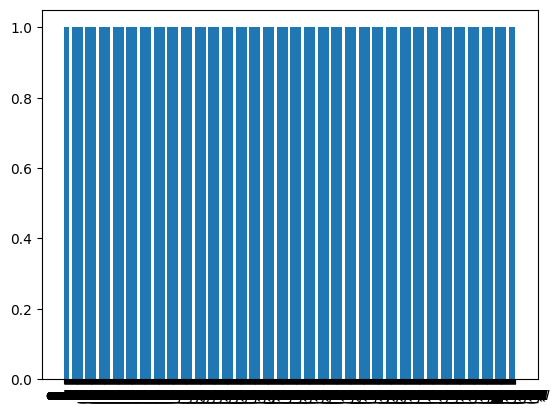

In [ ]:
X_org = X
scaler = StandardScaler()
X = scaler.fit_transform(X)
plt.bar(X_org.columns,X.std(axis=0))

We see that now the standard deviations of all features are the same at 1.

We split data into training and test sets:

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size = 0.5, random_state=2)

We go to logs. The log-transformation makes the data much more amenable to regression.

In [ ]:
y_train = np.log(y_train)
y_val = np.log(y_val)
y_test = np.log(y_test)

## Baseline Linear Regression
We start by re-running the baseline linear regression using all features:

In [ ]:
import statsmodels.api as sm

# Add intercept
X_ols = sm.add_constant(X)  # Adds a column of 1s for the intercept
ols_model = sm.OLS(y, X_ols).fit()

# Summary of the OLS model
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   loss   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     70.04
Date:                Fri, 07 Nov 2025   Prob (F-statistic):               0.00
Time:                        02:47:18   Log-Likelihood:            -4.5025e+05
No. Observations:               50000   AIC:                         9.022e+05
Df Residuals:                   49135   BIC:                         9.099e+05
Df Model:                         864                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3048.6744      8.891    342.913      0.0

To evaluate predictive performance for loss modeling, I first ran an ordinary least squares (OLS) regression using all available predictors. The model achieved an R-squared of 0.552, indicating moderate explanatory power. However, diagnostic statistics revealed serious multicollinearity issues: the condition number was extremely high (4.24e+17), and the smallest eigenvalue was near zero, suggesting that many predictors were highly correlated. Additionally, the residuals showed strong non-normality, with a skew of 2.582, kurtosis of 31.662, and a Jarque-Bera p-value of 0.00. These issues compromise the stability and interpretability of the OLS estimates.

Given the limitations of the OLS model—particularly the presence of severe multicollinearity and a high number of predictors—an alternative approach is needed to improve model stability and predictive accuracy. LASSO regression offers a solution by introducing regularization that penalizes large coefficients and shrinks many to zero, effectively performing variable selection. This helps reduce overfitting, simplifies the model, and mitigates the impact of correlated features. By focusing only on the most relevant predictors, LASSO can produce a more interpretable and robust model, especially in high-dimensional settings where traditional OLS struggles.

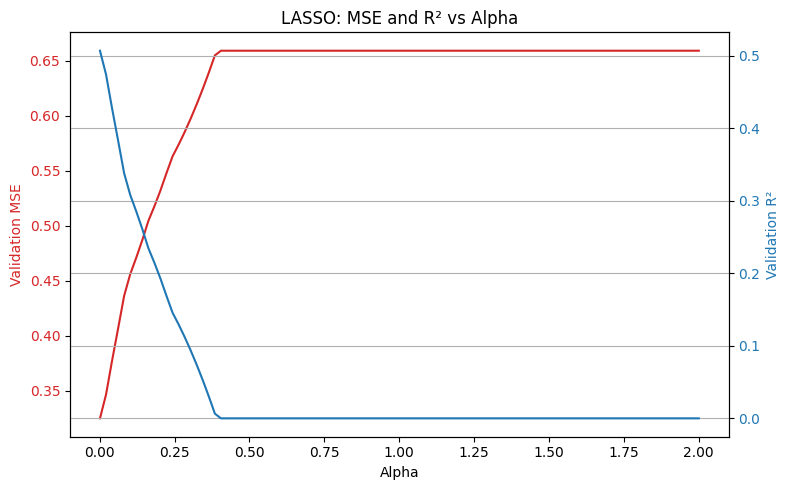

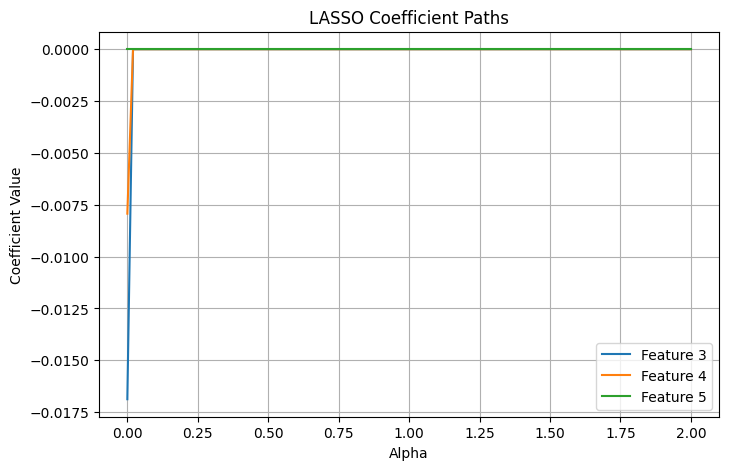

In [ ]:
from sklearn.linear_model import Lasso
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Range of alpha values
alpha_values = np.linspace(0.001, 2, 100)
r2_values = []
mse_values = []
coef_paths = []

# Track coefficients for selected features (e.g., top 3 by index)
selected_indices = [3, 4, 5]
coef_selected = {i: [] for i in selected_indices}

# Loop through alpha values
for alpha in alpha_values:
    model_lasso = Lasso(alpha=alpha, max_iter=10000)
    model_lasso.fit(X_train, y_train)
    y_pred = model_lasso.predict(X_val)

    r2_values.append(r2_score(y_val, y_pred))
    mse_values.append(mean_squared_error(y_val, y_pred))
    coef_paths.append(model_lasso.coef_)

    for i in selected_indices:
        coef_selected[i].append(model_lasso.coef_[i])

# Plot MSE and R² vs Alpha
fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.set_xlabel('Alpha')
ax1.set_ylabel('Validation MSE', color='tab:red')
ax1.plot(alpha_values, mse_values, color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Validation R²', color='tab:blue')
ax2.plot(alpha_values, r2_values, color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('LASSO: MSE and R² vs Alpha')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot coefficient paths for selected features
plt.figure(figsize=(8, 5))
for i in selected_indices:
    plt.plot(alpha_values, coef_selected[i], label=f'Feature {i}')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('LASSO Coefficient Paths')
plt.legend()
plt.grid(True)
plt.show()

## Visual Insights
From the MSE and R² plot, the optimal alpha appears to be around 0.15. At this point:
- - At alpha = 0.15, the validation MSE is around 0.49, which is among the lowest across the tested range.
- Validation R² is around 0.25, indicating that the model retains meaningful explanatory power.

- Beyond this alpha, both metrics degrade sharply, suggesting underfitting.
- In the MSE vs. alpha plot, the curve reaches its minimum around alpha = 0.15 before rising again, suggesting this is the point of optimal predictive accuracy.
- The R² curve also begins to decline sharply after this point, indicating that higher alpha values lead to underfitting.

From the coefficient path plot, we see:
- Feature 3 starts with a meaningful negative coefficient but is shrunk toward zero as alpha increases.
- Features 4 and 5 are near-zero throughout, indicating they contribute little to prediction and are effectively eliminated by LASSO.






## Final Model Fit and Performance
Now fit a final LASSO model using alpha = 0.15


In [ ]:
final_lasso = Lasso(alpha=0.15, max_iter=10000)
final_lasso.fit(X_train, y_train)

y_val_pred = final_lasso.predict(X_val)
mse_final = mean_squared_error(y_val, y_val_pred)
r2_final = r2_score(y_val, y_val_pred)

print(f"Final LASSO Validation MSE: {mse_final:.4f}")
print(f"Final LASSO Validation R²: {r2_final:.4f}")

Final LASSO Validation MSE: 0.4937
Final LASSO Validation R²: 0.2510


In [ ]:
nonzero = np.sum(final_lasso.coef_ != 0)
print(f"Non-zero coefficients: {nonzero} out of {X.shape[1]}")

Non-zero coefficients: 7 out of 935


Based on the validation plots, alpha = 0.15 emerges as a strong candidate for the LASSO regularization parameter. At this value, the model achieves a low validation MSE (0.4937) and a reasonable R² (0.2510), indicating solid predictive performance. Moreover, the model retains only 7 out of 935 predictors, highlighting LASSO’s ability to perform aggressive feature selection while preserving accuracy. This balance between performance and simplicity makes alpha = 0.15 an effective and interpretable choice.